# Fill-Outline Invariance (FOI) for different networks

In [1]:
%load_ext autoreload

In [34]:
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from spectools.stimulus.wyeth import get_stimulus
from spectools.responses import get_response_wrapper
from spectools.metrics.metrics import responsive
from spectools.models.models import AN_layer, VGG16_layer, ResNet18_layer

In [26]:
# params
xn = 227
sz = 50
lw = 1.5
fg = 1.0
bg = 0.0

verbose = False

## For AlexNet

In [21]:
# params
hkeys = list(AN_layer.keys())
mtype = "AN"

# fill stimulus
fill = get_stimulus(1, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_fills = get_response_wrapper(hkeys, fill, fname, mtype=mtype)

# outline stimulus
outline = get_stimulus(0, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=0_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_outlines = get_response_wrapper(hkeys, outline, fname, mtype=mtype)

In [27]:
prs = {}
for hkey in hkeys:
    R_fill = R_fills[hkey]
    R_outline = R_outlines[hkey]

    prs[hkey] = []
    for unit in range(R_fill.shape[0]):
        resp = responsive(R_fill[unit]) and responsive(R_outline[unit])
        if resp:
            pr = np.corrcoef(R_fill[unit], R_outline[unit])[0][1]
            prs[hkey].append(pr)
        elif verbose:
            print(f"Layer {hkey}, unit {unit} not responsive!")

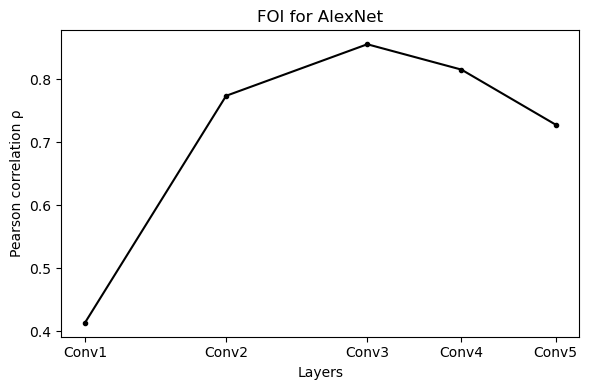

In [23]:
func = np.mean
res = [func(prs[hkey]) for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([AN_layer[hkey] for hkey in  hkeys])
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("FOI for AlexNet")
plt.tight_layout(); plt.show()

## For VGG16

In [29]:
# params
hkeys = list(VGG16_layer.keys())
mtype = "VGG16"

# fill stimulus
fill = get_stimulus(1, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_fills = get_response_wrapper(hkeys, fill, fname, mtype=mtype)

# outline stimulus
outline = get_stimulus(0, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=0_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_outlines = get_response_wrapper(hkeys, outline, fname, mtype=mtype)

In [30]:
prs = {}
for hkey in hkeys:
    R_fill = R_fills[hkey]
    R_outline = R_outlines[hkey]

    prs[hkey] = []
    for unit in range(R_fill.shape[0]):
        resp = responsive(R_fill[unit]) and responsive(R_outline[unit])
        if resp:
            pr = np.corrcoef(R_fill[unit], R_outline[unit])[0][1]
            prs[hkey].append(pr)
        elif verbose:
            print(f"Layer {hkey}, unit {unit} not responsive!")

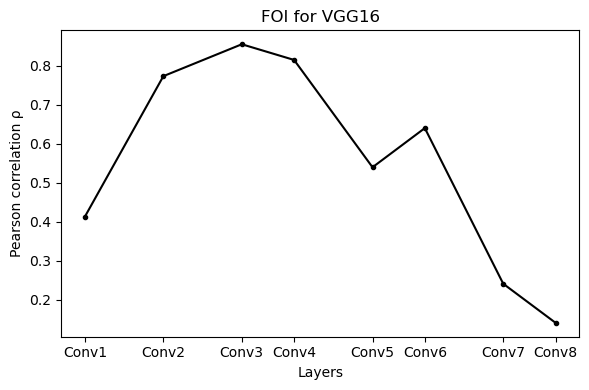

In [32]:
func = np.mean
res = [func(prs[hkey]) for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([VGG16_layer[hkey] for hkey in  hkeys])
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("FOI for VGG16")
plt.tight_layout(); plt.show()

## For ResNet18

In [35]:
# params
hkeys = list(ResNet18_layer.keys())
mtype = "ResNet18"

# fill stimulus
fill = get_stimulus(1, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_fills = get_response_wrapper(hkeys, fill, fname, mtype=mtype)

# outline stimulus
outline = get_stimulus(0, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=0_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_outlines = get_response_wrapper(hkeys, outline, fname, mtype=mtype)

In [36]:
prs = {}
for hkey in hkeys:
    R_fill = R_fills[hkey]
    R_outline = R_outlines[hkey]

    prs[hkey] = []
    for unit in range(R_fill.shape[0]):
        resp = responsive(R_fill[unit]) and responsive(R_outline[unit])
        if resp:
            pr = np.corrcoef(R_fill[unit], R_outline[unit])[0][1]
            prs[hkey].append(pr)
        elif verbose:
            print(f"Layer {hkey}, unit {unit} not responsive!")

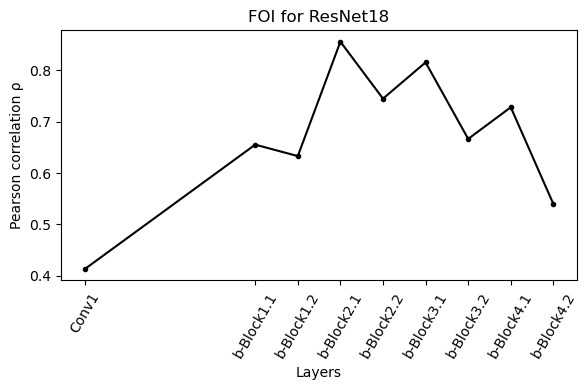

In [38]:
func = np.mean
res = [func(prs[hkey]) for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([ResNet18_layer[hkey] for hkey in  hkeys], rotation=60)
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("FOI for ResNet18")
plt.tight_layout(); plt.show()